<a href="https://colab.research.google.com/github/KarlaMichelleSorianoSanhez/EDP-1/blob/main/clase_del_m%C3%A9todo_de_Galerkin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#MÉTODO DE GALERKIN

Este es un tipo de método de residuos pesados, donde las funciones de peso coinciden con las funciones base
$$Β_i $$

In [2]:
#importamos librerias

import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

Queremos resolver la ecuación
$$\frac{d^2u}{dx^2}+u=-x$$

sujeta a condiciones de frontera

$$u(0)=u(1)=0$$

##ANALITICAMENTE

In [3]:
#Definimos la variable simbólica y función
x,a,b=sp.symbols('x a b')
u= sp.Function('u')


In [4]:
#Ecuación diferencial u''+u=x
ode = u(x).diff(x,x)+u(x)+x
sp.dsolve(ode,u(x))  #resuelve la ecuaión

Eq(u(x), C1*sin(x) + C2*cos(x) - x)

In [5]:
#resolver con las condiciones iniciales
sol = sp.dsolve(ode, ics={u(0):0 , u(1):0})

print("Solución exacta simbólica:")
sol

Solución exacta simbólica:


Eq(u(x), -x + sin(x)/sin(1))

In [6]:
#convertimos la solución simbolica a función numérica
u_expr = sol.rhs

u_num = sp.lambdify(x,u_expr, "numpy") #se redefine como arreglo

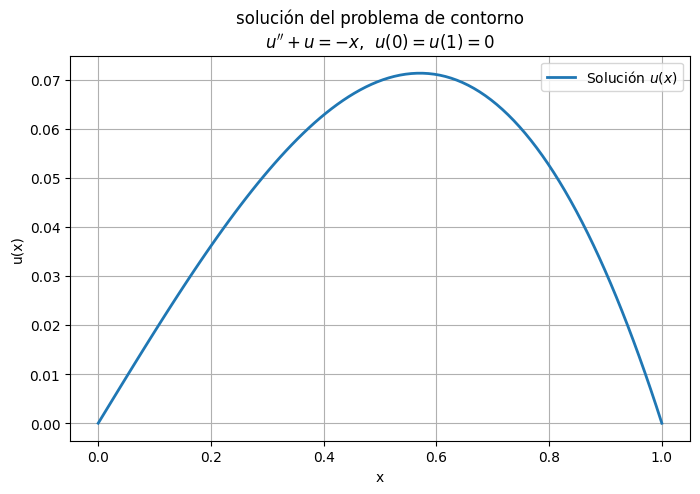

In [7]:

#malla para graficar
xx= np.linspace(0,1,100)
yy= u_num(xx)



#Grafica
plt.figure(figsize=(8,5))
plt.plot(xx,yy , label = "Solución $u(x)$", linewidth=2)
plt.title("solución del problema de contorno\n$u'' + u = -x$,  $u(0)=u(1)=0$")
plt.xlabel("x")
plt.ylabel("u(x)")
plt.legend()
plt.grid(True)
plt.show()

##NUMERICA

In [22]:
u_2= a *x*(1-x) + b *x**2 *(1-x)
u_2

a*x*(1 - x) + b*x**2*(1 - x)

Definimos el residuo o error E

In [23]:
u_2_d_2= sp.diff(u_2,x,2) #calculo de la segunda derivada
u_2_d_2

-2*(a + 2*b*x + b*(x - 1))

In [24]:
#E(x)
E= u_2_d_2 + u_2+x
E

a*x*(1 - x) + b*x**2*(1 - x) + x - 2*(a + 2*b*x + b*(x - 1))

In [25]:
E.simplify() #simplifica

-a*x*(x - 1) - 2*a - b*x**2*(x - 1) - 4*b*x - 2*b*(x - 1) + x

Imponemos las condiciones

$$\int_0^1 Ex(1-x) dx= 0$$

$$\int_0^1 Ex^2(1-x) dx= 0$$

Y resolvemos el sistema de ecuaciones resultantes:

In [12]:
I_1 = sp.integrate( E*x*(1-x), (x,0,1))
I_1

-3*a/10 - 3*b/20 + 1/12

In [26]:
sp.simplify(I_1)

-3*a/10 - 3*b/20 + 1/12

In [27]:
I_2 = sp.integrate( E*x**2*(1-x), (x,0,1))
I_2

-3*a/20 - 13*b/105 + 1/20

dado e

In [28]:
#para igualar a 0
soleq = sp.solve ([I_1, I_2], [a,b], simplify=True)
soleq

{a: 71/369, b: 7/41}

In [29]:
#sustituir en la función de prueba
u_approx = u_2.subs (soleq)
u_approx

7*x**2*(1 - x)/41 + 71*x*(1 - x)/369

In [30]:
u_approx_fn =sp.lambdify(x,u_approx, "numpy")

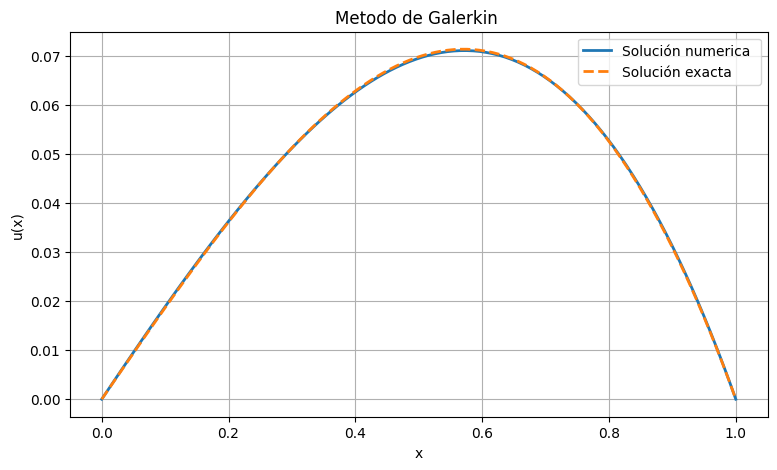

In [31]:
xx= np.linspace(0,1,100)


plt.figure(figsize=(9,5))
plt.plot(xx, u_approx_fn(xx) , label = "Solución numerica ", linewidth=2)
plt.plot(xx, yy,"--", label = "Solución exacta", linewidth=2) #-- tipo de linea punteada

plt.title("Metodo de Galerkin ")
plt.xlabel("x")
plt.ylabel("u(x)")
plt.legend()
plt.grid(True)
plt.show()